In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

#必要なライブラリを import 
from sklearn import datasets
import numpy as np

# 訓練用データの取得
data_train = np.loadtxt('data_train.csv', delimiter=',', encoding='utf-8_sig')
y_train = data_train[:,0].astype(int)
X_train = data_train[:,1:3]

# テスト用データの取得
data_test = np.loadtxt('data_test.csv', delimiter=',', encoding='utf-8_sig') 
y_test = data_test[:,0].astype(int)
X_test = data_test[:,1:3]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

# データの標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [3]:
from sklearn.svm import SVC

from sklearn.datasets import load_digits
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

# 線形SVMのインスタンスを生成
estimator = SVC(kernel='linear', gamma=1/2 , C=1.0,class_weight='balanced', random_state=0)
model = OneVsRestClassifier(estimator)

# モデルの学習。fit関数で行う。
model.fit(X_train_std, y_train)

OneVsRestClassifier(estimator=SVC(class_weight='balanced', gamma=0.5,
                                  kernel='linear', random_state=0))

In [4]:
from sklearn.metrics import accuracy_score

# トレーニングデータに対する精度
pred_train = model.predict(X_train_std)
accuracy_train = accuracy_score(y_train, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)

# テストデータに対する精度
pred_test = model.predict(X_test_std)
accuracy_test = accuracy_score(y_test, pred_test)
print('テストデータに対する正解率： %.2f' % accuracy_test)

トレーニングデータに対する正解率： 0.61
テストデータに対する正解率： 0.78


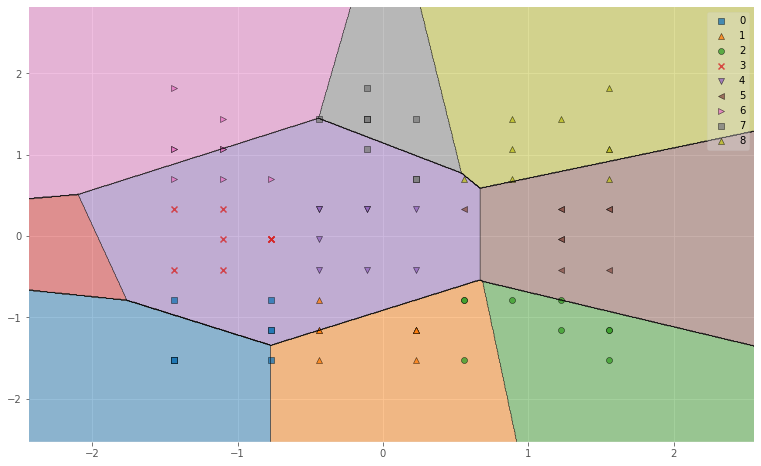

In [5]:
#分類結果を図示する
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_combined_std, y_combined, clf=model,  res=0.02)
plt.show()

In [6]:
# 書き出し
import os
path_w = './../Assets/SVM/Parameters'

np.savetxt(os.path.join(path_w, 'coef.txt'), model.coef_, fmt='%0.18f')
np.savetxt(os.path.join(path_w, 'intercept.txt'), model.intercept_, fmt='%0.18f')
#np.savetxt(os.path.join(path_w, 'supportVector.txt'), model.support_vectors_, fmt='%0.18f')
#np.savetxt(os.path.join(path_w, 'dualCoef.txt'), model.dual_coef_, fmt='%0.18f')

AttributeError: 'OneVsRestClassifier' object has no attribute 'support_vectors_'

In [ ]:
# WX+b=0のW (kernel="linear"のときのみ利用可)
print(len(model.coef_))
print(model.coef_)

In [ ]:
# WX+b=0のb
print(len(model.intercept_))
print(model.intercept_)

In [ ]:
# サポートベクタ
#print(len(model.support_vectors_))
#print(model.support_vectors_)

In [ ]:
# サポートベクタとの乗算でW
#print(len(model.dual_coef_))
#print(model.dual_coef_)